In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=891158e659c526b5b1bf8c689ecbfd8bba0db9e55a813566401ef7ade5988143
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from ta.momentum import RSIIndicator
from ta.trend import MACD,EMAIndicator

In [ ]:

df = yf.download('GC=F', start='2010-01-01', end='2024-06-01')

/tmp/ipython-input-5673720.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('GC=F', start='2010-01-01', end='2024-06-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Veri setindeki başlık formatını ayarlama
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

In [5]:
df.shape

(3624, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3624 entries, 2010-01-04 to 2024-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3624 non-null   float64
 1   High    3624 non-null   float64
 2   Low     3624 non-null   float64
 3   Open    3624 non-null   float64
 4   Volume  3624 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 169.9 KB


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
count,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000
mean,1504.735430,1512.317909,1496.974642,1504.847600,5412.825055
std,293.522960,295.288233,291.900257,293.501198,29034.962508
min,1050.800049,1062.000000,1045.199951,1052.199951,0.000000
25%,1255.000000,1261.225037,1250.825012,1255.975006,45.000000
50%,1399.799988,1411.599976,1390.250000,1402.200012,158.500000
75%,1761.875031,1770.575012,1753.649994,1762.425018,509.750000
max,2433.899902,2435.800049,2421.000000,2429.500000,386334.000000


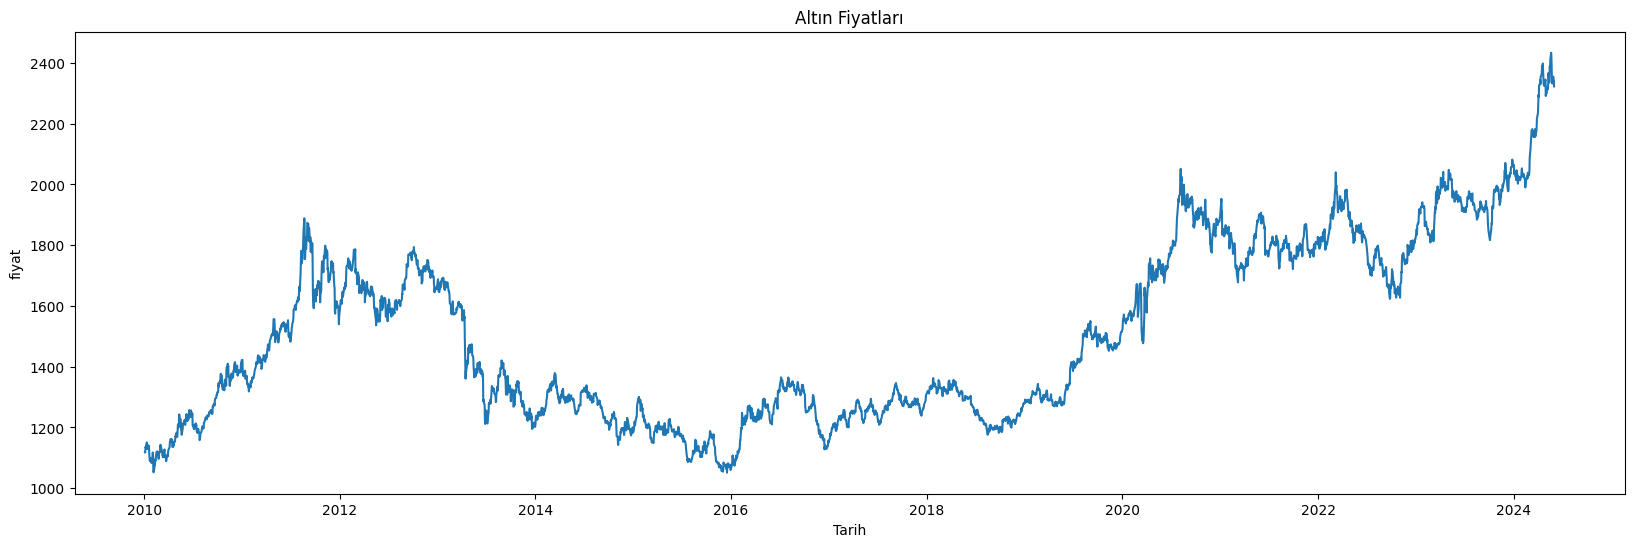

In [8]:
plt.figure(figsize=(20,6))
plt.plot(df.index,df["Close"])
plt.title("Altın Fiyatları")
plt.xlabel("Tarih")
plt.ylabel("fiyat")
plt.show()

In [9]:
# RSI değerimizi data setimize ekliyoruz
df["RSI"] = RSIIndicator(df["Close"].squeeze()).rsi()


In [10]:
#MACD değerimizi data setimize ekliyoruz
macd = MACD(df["Close"].squeeze())
df["MACD"] = macd.macd()

In [11]:
#EMA yani hareketli ortalma değerlerimizide veri setimize ekliyoruz
df["ema50"] = EMAIndicator(df["Close"].squeeze(), window=50).ema_indicator()
df["ema200"] = EMAIndicator(df["Close"].squeeze(), window=200).ema_indicator()

In [12]:
df = df.dropna()
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,ema50,ema200
Date,,,,,,,,,
2010-10-18,1371.199951,1372.599976,1358.000000,1358.000000,46,76.387889,28.798127,1288.275203,1210.344653
2010-10-19,1335.099976,1370.500000,1328.500000,1366.800049,301,56.082259,25.548461,1290.111468,1211.586000
2010-10-20,1343.300049,1345.800049,1334.199951,1336.000000,148,58.763694,23.365413,1292.197295,1212.896587
2010-10-21,1324.699951,1346.199951,1317.500000,1344.199951,102,51.136873,19.905006,1293.471909,1214.009058
2010-10-22,1324.400024,1328.099976,1319.000000,1326.699951,113,51.021878,16.943098,1294.684776,1215.107476


In [13]:
# Hacmi 0 olan (hatalı/tatil) günleri verisetinden çıkar
df= df[df['Volume'] > 0]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3390 entries, 2010-10-18 to 2024-05-31
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3390 non-null   float64
 1   High    3390 non-null   float64
 2   Low     3390 non-null   float64
 3   Open    3390 non-null   float64
 4   Volume  3390 non-null   int64  
 5   RSI     3390 non-null   float64
 6   MACD    3390 non-null   float64
 7   ema50   3390 non-null   float64
 8   ema200  3390 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 264.8 KB


In [ ]:
tanımsal_ist = df.describe().T
# Excel olarak kaydet
tanımsal_ist.to_excel("tanimsal_istatistikler.xlsx")



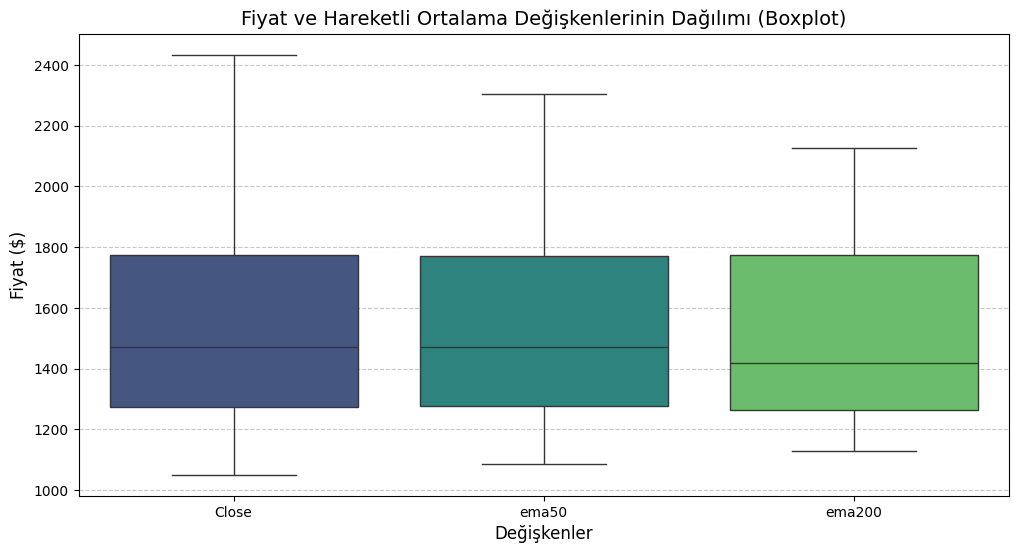

In [ ]:
#  Fiyat Bazlı Değişkenler
değişkenler = [ "Close","ema50", "ema200"]
df_F = df[değişkenler]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_F, palette="viridis")

plt.title('Fiyat ve Hareketli Ortalama Değişkenlerinin Dağılımı (Boxplox)')
plt.ylabel('Fiyat ($)', fontsize=12)
plt.xlabel('Değişkenler', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

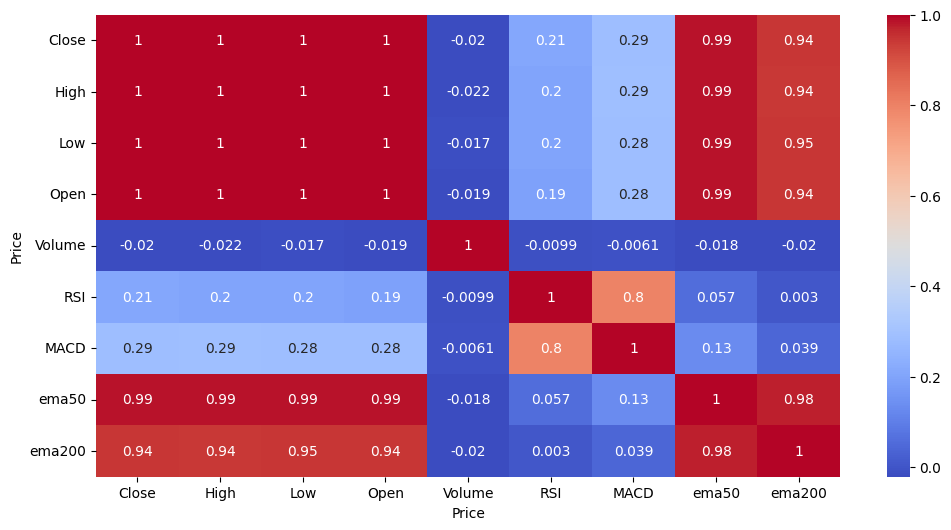

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


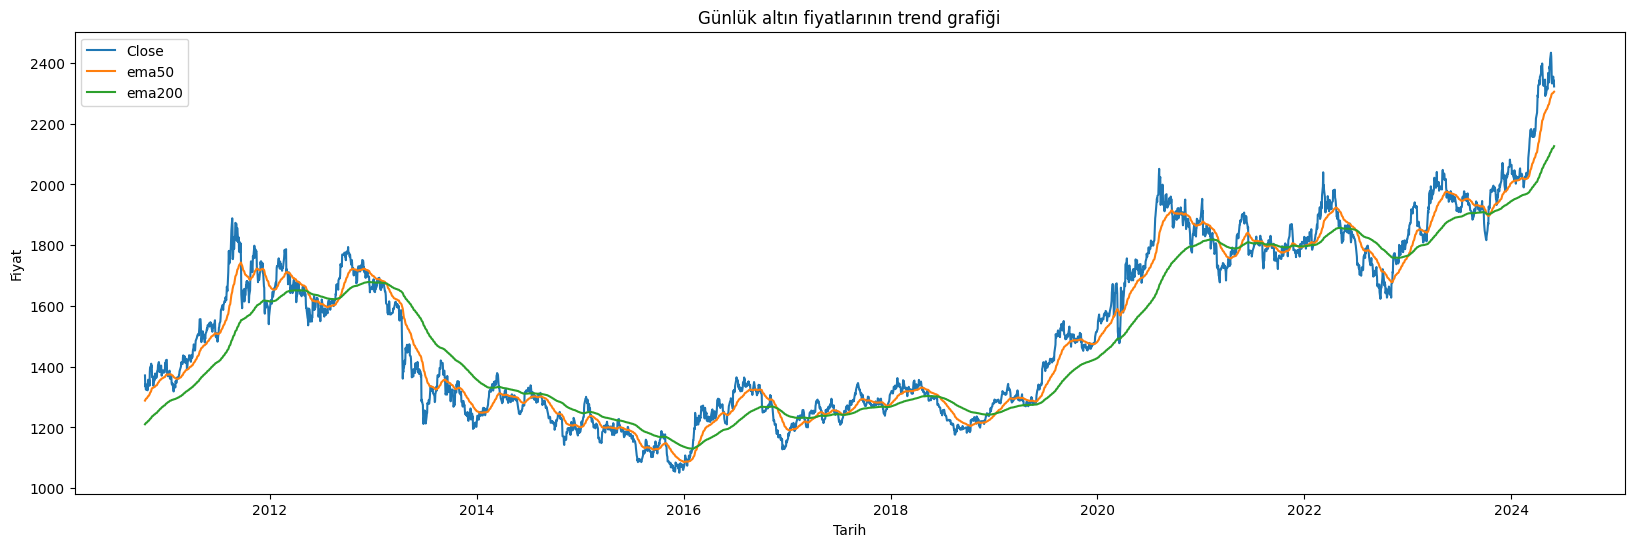

In [17]:
#hareketli ortalmalarla fiyatın tredi nasıl sürdürdüğünü görüyoruz
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['ema50'], label='ema50')
plt.plot(df.index, df['ema200'], label='ema200')
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.title('Günlük altın fiyatlarının trend grafiği')
plt.legend()
plt.show()

In [ ]:
# VERİLERİN ÖLÇEKLENDİRİLMESİ

# İlgili sütunları seçelim
features = df[['Close', 'RSI', 'MACD', 'Volume',"ema50","ema200"]].values
hedef = df[['Close']].values          # Hedef (Çıktı)

feature_ölçek = MinMaxScaler(feature_range=(0,1))
target_ölçek = MinMaxScaler(feature_range=(0,1))

scaled_features = feature_ölçek.fit_transform(features)
scaled_target = target_ölçek.fit_transform(hedef)
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,ema50,ema200
Date,,,,,,,,,
2010-10-18,1371.199951,1372.599976,1358.000000,1358.000000,46,76.387889,28.798127,1288.275203,1210.344653
2010-10-19,1335.099976,1370.500000,1328.500000,1366.800049,301,56.082259,25.548461,1290.111468,1211.586000
2010-10-20,1343.300049,1345.800049,1334.199951,1336.000000,148,58.763694,23.365413,1292.197295,1212.896587
2010-10-21,1324.699951,1346.199951,1317.500000,1344.199951,102,51.136873,19.905006,1293.471909,1214.009058
2010-10-22,1324.400024,1328.099976,1319.000000,1326.699951,113,51.021878,16.943098,1294.684776,1215.107476


In [ ]:
# EĞİTİM VE TEST VERİSİNİN AYRILMASI (%80 - %20)
egitim_size = int(len(scaled_features) * 0.8)

# Hem features hem target için ayırıyoruz
egitim_features = scaled_features[:egitim_size]
test_features = scaled_features[egitim_size:]
egitim_target = scaled_target[:egitim_size]
test_target = scaled_target[egitim_size:]

In [ ]:
# 5. DİZİLERİN OLUŞTURULMASI
def dizileri_oluştur(X_data, y_data, seq_length):
    X, y = [], []
    for i in range(len(X_data) - seq_length):
        # i'den i+seq_length'e kadar olan özellikleri al
        X.append(X_data[i:i+seq_length])
        # i+seq_length anındaki hedefi al 
        y.append(y_data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60

# Sequence fonksiyonuna hem feature hem target gönderiyoruz
X_train, y_train = dizileri_oluştur(egitim_features, egitim_target, seq_length)
X_test, y_test = dizileri_oluştur(test_features, test_target, seq_length)

print(f"Eğitim Verisi Şekli: {X_train.shape}")


Eğitim Verisi Şekli: (2652, 60, 6)


In [ ]:
from keras.src.callbacks.learning_rate_scheduler import LearningRateScheduler


#  MODELİN KURULUMU
model = Sequential()

# input_shape artık dinamik: (60, 2)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.25))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.25))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# EĞİTİM
Tarih = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.5422e-04 - val_loss: 2.8326e-04
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.6822e-04 - val_loss: 0.0028
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 4.7914e-04 - val_loss: 0.0010
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 4.6015e-04 - val_loss: 0.0018
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.3684e-04 - val_loss: 5.1461e-04
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.4423e-04 - val_loss: 0.0018
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 4.1687e-04 - val_loss: 6.6145e-04
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.5397e-04 - val_loss: 0.0011
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 4.0730e-04 - val_loss: 9.1982e-04
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 4.4140e-04 - val_loss: 0.0012
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 4.3304e-04 - val_loss: 0.0020


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Modeli Drive'a kaydetme kodu
model.save('/content/drive/MyDrive/buyuk__veri_final_model_yeni.keras')
print("Model Google Drive'a güvenle kaydedildi!")

Model Google Drive'a güvenle kaydedildi!


In [ ]:
from google.colab import drive
from keras.models import load_model

#  Drive'ı tekrar bağla
drive.mount('/content/drive')

#  Modeli yükle
# Kaydettiğin yolun aynısını buraya yaz
yuklenen_model = load_model('/content/drive/MyDrive/buyuk__veri_final_model_yeni.keras')

#  Kontrol et (Özetini gör)
yuklenen_model.summary()

print("Model yüklendi, kullanıma hazır!")

Mounted at /content/drive


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,955 (370.92 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,304 (247.29 KB)

Model yüklendi, kullanıma hazır!


In [ ]:
#  TAHMİN VE GÖRSELLEŞTİRME
predictions = model.predict(X_test)

predictions = target_ölçek.inverse_transform(predictions)

# Gerçek değerleri de orijinal ölçeğe çevirelim 
actual_prices = target_ölçek.inverse_transform(y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


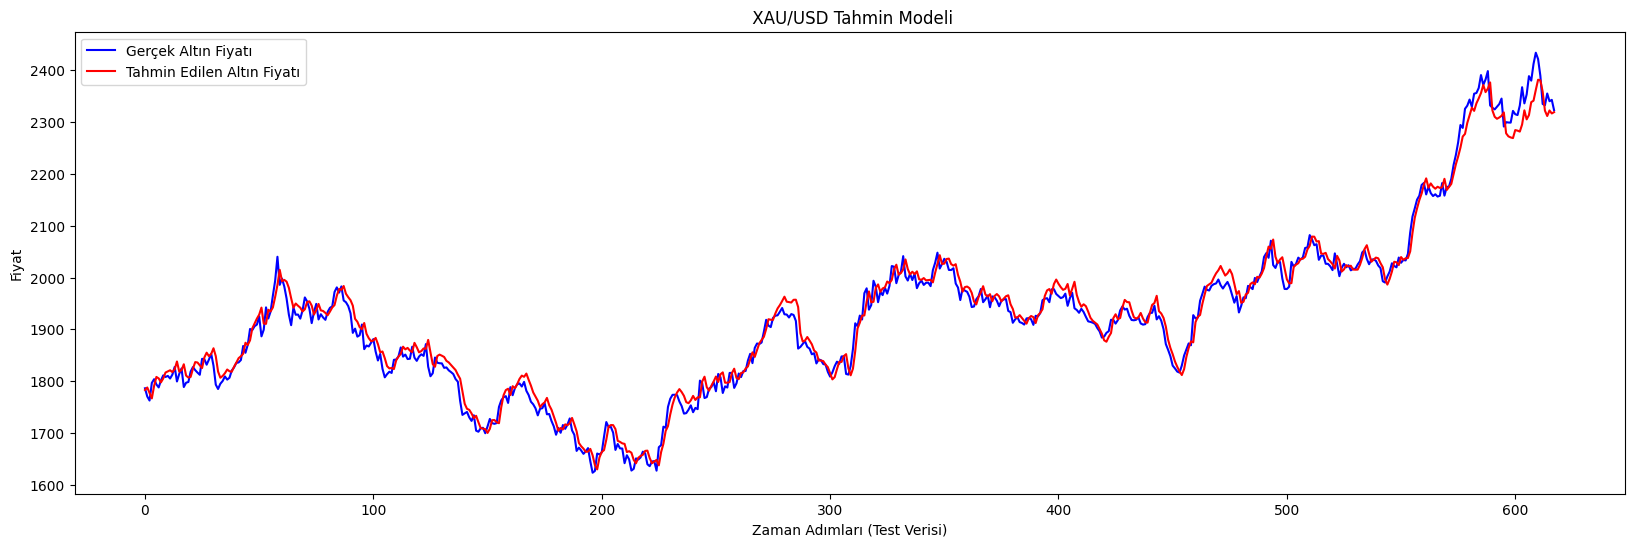

In [ ]:

# Sonuç Grafiği
plt.figure(figsize=(20,6))
# Sadece test verisinin olduğu kısmı çizdiriyoruz
plt.plot(actual_prices, color='blue', label='Gerçek Altın Fiyatı')
plt.plot(predictions, color='red', label='Tahmin Edilen Altın Fiyatı')
plt.title(' XAU/USD Tahmin Modeli')
plt.xlabel('Zaman Adımları (Test Verisi)')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

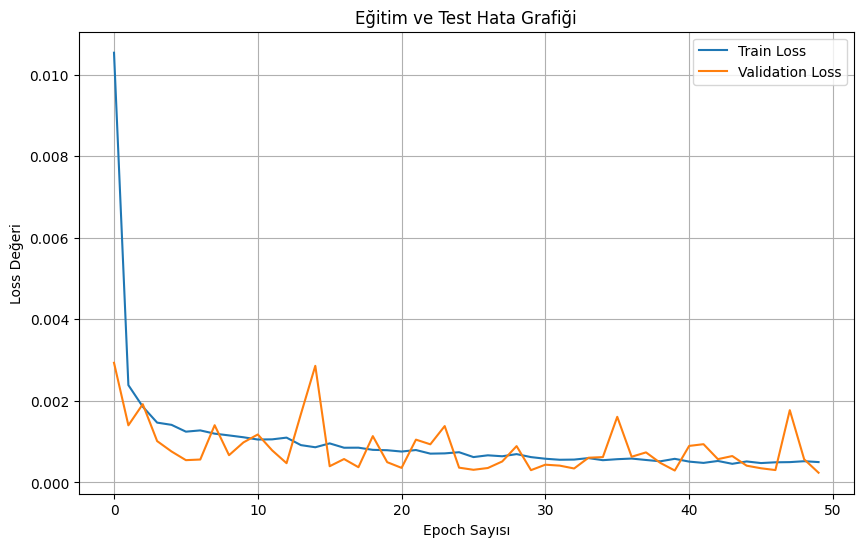

Sonuçlar:
--------------------
Eğitim Hatası: 0.0005
Test Hatası:   0.00024
Hata Farkı:    -0.00026
--------------------
Yorum: Test hatası daha düşük, model iyi öğrenmiş görünüyor.


In [ ]:

# Loss Grafiğini Çizdirme 
plt.figure(figsize=(10, 6))
plt.plot(Tarih.history['loss'], label='Train Loss')
plt.plot(Tarih.history['val_loss'], label='Validation Loss')

plt.title('Eğitim ve Test Hata Grafiği')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Loss Değeri')
plt.legend()
plt.grid(True)
plt.show()

# Sonuçları Yazdırma

egitim_hatasi = Tarih.history['loss'][-1]
test_hatasi = Tarih.history['val_loss'][-1]

# Farkı hesaplıyorum
fark = test_hatasi - egitim_hatasi

print("Sonuçlar:")
print("-" * 20)
print("Eğitim Hatası:", round(egitim_hatasi, 5))
print("Test Hatası:  ", round(test_hatasi, 5))
print("Hata Farkı:   ", round(fark, 5))
print("-" * 20)

# Basit bir kontrol yapısı
if test_hatasi < egitim_hatasi:
    print("Yorum: Test hatası daha düşük, model iyi öğrenmiş görünüyor.")
elif test_hatasi > (egitim_hatasi * 1.2):
    print("Yorum: Test hatası eğitimden bayağı yüksek, overfitting olabilir.")
else:
    print("Yorum: Değerler birbirine yakın, model stabil duruyor.")

In [ ]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Önce verileri tek boyuta indiriyorum 
gercek_veriler = np.array(actual_prices).flatten()
tahmin_veriler = np.array(predictions).flatten()

# Temel Hata Metrikleri
# RMSE ve MAE hesaplıyorum
mse_degeri = mean_squared_error(gercek_veriler, tahmin_veriler)
rmse_degeri = math.sqrt(mse_degeri)
mae_degeri = mean_absolute_error(gercek_veriler, tahmin_veriler)


# Yön Doğruluğu (Directional Accuracy)
gercek_fark = np.diff(gercek_veriler)
tahmin_fark = np.diff(tahmin_veriler)

# İşaretler aynı mı diye kontrol ediyorum
dogru_yon_sayisi = np.sign(gercek_fark) == np.sign(tahmin_fark)
yon_basarisi = np.mean(dogru_yon_sayisi) * 100



Model Performans Sonuçlarım:
------------------------------
RMSE (Ortalama Hata): 21.41
MAE (Mutlak Hata): 16.59
R-Kare (R2): 0.9828
Yön Bilme Başarısı (%): 49.27
Theil U Katsayısı: 1.2359
Yorum: Model, Naive modelin gerisinde kaldı.


2025 Verileri Çekiliyor...
Tahminler üretiliyor...


/tmp/ipython-input-12076258.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_test = yf.download('GC=F', start='2023-06-01', progress=False)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


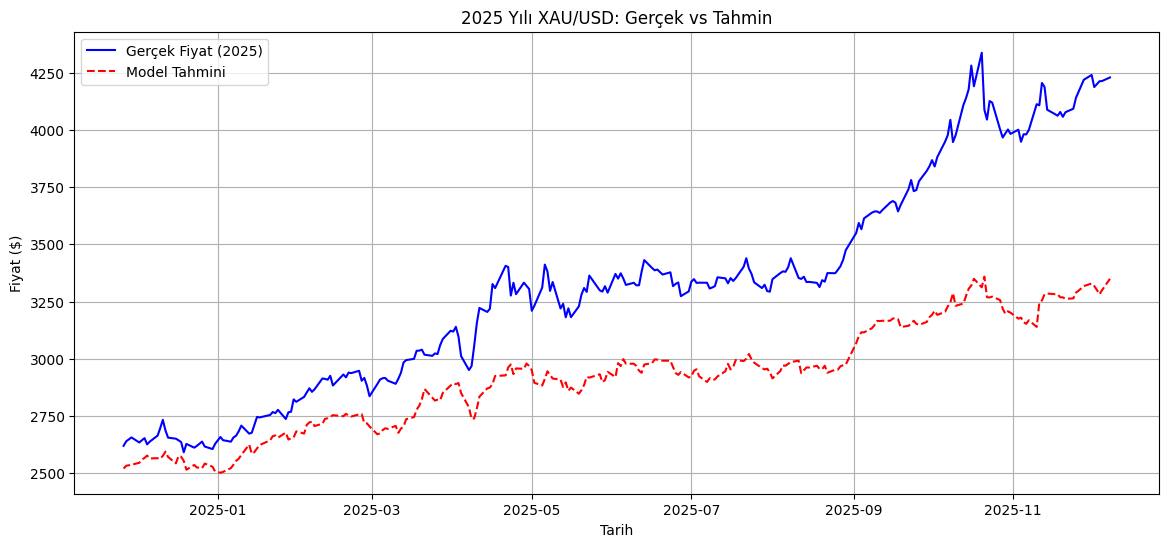

In [ ]:

df_test = yf.download('GC=F', start='2023-06-01', progress=False)

# Sütun adı düzeltmesi
if isinstance(df_test.columns, pd.MultiIndex):
    df_test.columns = df_test.columns.get_level_values(0)


# 2025 için indikatörleri hesaplama 

# RSI
delta = df_test['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_test['RSI'] = 100 - (100 / (1 + rs))

# MACD
ema12 = df_test['Close'].ewm(span=12, adjust=False).mean()
ema26 = df_test['Close'].ewm(span=26, adjust=False).mean()
df_test['MACD'] = ema12 - ema26

# EMA 50 ve 200
df_test['ema50'] = df_test['Close'].ewm(span=50, adjust=False).mean()
df_test['ema200'] = df_test['Close'].ewm(span=200, adjust=False).mean()

df_test.dropna(inplace=True)


mask = (df_test.index >= '2024-09-01') # Tarih aralığı güncellendi
final_data = df_test.loc[mask].copy()


features = ['Close', 'RSI', 'MACD', 'Volume', 'ema50', 'ema200']
input_values = final_data[features].values
scaled_final = feature_ölçek.transform(input_values)

#  60 GÜNLÜK PENCERELERİ OLUŞTURMA

X_2025 = []
y_2025_real = [] # Gerçek değerler (Kıyaslamak için)


start_idx = seq_length

print("Tahminler üretiliyor...")
for i in range(start_idx, len(scaled_final)):
    X_2025.append(scaled_final[i-seq_length:i])
    y_2025_real.append(scaled_final[i, 0]) # 0. indeks Close fiyatı

X_2025 = np.array(X_2025)
y_2025_real = np.array(y_2025_real)


predictions = yuklenen_model.predict(X_2025)

#  SONUÇLARI DOLARA ÇEVİR 

# Boyut hatasını düzeltmek için geçici matris oluşturma

# Tahminler için
dummy_pred = np.zeros((len(predictions), 6))
dummy_pred[:, 0] = predictions.flatten()
final_predictions = target_ölçek.inverse_transform(dummy_pred)[:, 0]

# Gerçekler için
dummy_real = np.zeros((len(y_2025_real), 6))
dummy_real[:, 0] = y_2025_real.flatten()
final_real_prices = target_ölçek.inverse_transform(dummy_real)[:, 0]

# GRAFİK
dates = final_data.index[start_idx:]

plt.figure(figsize=(14, 6))
plt.plot(dates, final_real_prices, label='Gerçek Fiyat (2025)', color='blue')
plt.plot(dates, final_predictions, label='Model Tahmini', color='red', linestyle='--')
plt.title('2025 Yılı XAU/USD: Gerçek vs Tahmin')
plt.xlabel('Tarih')
plt.ylabel('Fiyat ($)')
plt.legend()
plt.grid(True)
plt.show()